Generate Fake Data

In [ ]:
import pandas as pd 
import numpy as np

np.random.seed(42)

dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Smartwatch']
categories = {
    'Laptop': 'Electronics',
    'Smartphone': 'Electronics',
    'Tablet': 'Electronics',
    'Headphones': 'Accessories',
    'Smartwatch': 'Accessories'
}
# Generate Random Sales Data
data = {
    'Date': np.random.choice(dates, size=1000),
    'Product': np.random.choice(products, size=1000),
    'Units_Sold': np.random.randint(0, 5, size=1000),
    'Price_per_Unit': np.random.randint(100, 1500, 1000)
}

# Create Dataframe
df = pd.DataFrame(data)

# Add Category Column
df['Category'] = df['Product'].map(categories)

# Calculate Total Sales
df['Total_Sales'] = df['Units_Sold'] * df['Price_per_Unit']

        Date     Product  Units_Sold  Price_per_Unit     Category  Total_Sales
0 2023-04-13      Tablet           4             461  Electronics         1844
1 2023-12-15      Tablet           0             540  Electronics            0
2 2023-09-28      Laptop           0             192  Electronics            0
3 2023-04-17  Smartphone           0             852  Electronics            0
4 2023-03-13  Smartphone           0             966  Electronics            0
5 2023-07-08  Smartwatch           2             241  Accessories          482
6 2023-01-21  Smartphone           3            1414  Electronics         4242
7 2023-04-13  Headphones           1             848  Accessories          848
8 2023-05-02  Smartphone           2             752  Electronics         1504
9 2023-08-03  Smartwatch           2             800  Accessories         1600


Data Overview

In [11]:
print("\n --------- Data Overview -----------")
print(df.info())



 --------- Data Overview -----------
        Date     Product  Units_Sold  Price_per_Unit     Category  Total_Sales
0 2023-04-13      Tablet           4             461  Electronics         1844
1 2023-12-15      Tablet           0             540  Electronics            0
2 2023-09-28      Laptop           0             192  Electronics            0
3 2023-04-17  Smartphone           0             852  Electronics            0
4 2023-03-13  Smartphone           0             966  Electronics            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1000 non-null   datetime64[ns]
 1   Product         1000 non-null   object        
 2   Units_Sold      1000 non-null   int32         
 3   Price_per_Unit  1000 non-null   int32         
 4   Category        1000 non-null   object        
 5   Total_Sales   

Data Cleaning

In [12]:
# Check for missing values
print(df.isnull().sum())

Date              0
Product           0
Units_Sold        0
Price_per_Unit    0
Category          0
Total_Sales       0
dtype: int64


Analysis

In [28]:
#1. Total Revenue

total_revenue = df['Total_Sales'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

#2. Best Selling Products
best_selling = df.groupby('Product')['Units_Sold'].sum().sort_values(ascending=False)
print("\n-------- Best Selling Products--------")
print(best_selling)

#3. Monthly Revenue
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Total_Sales'].sum()
print("\n--------Monthly Revenue---------")
print(monthly_revenue)

#4. Revenue by Category
revenue_by_category = df.groupby('Category')['Total_Sales'].sum()
print("\n--------Revenue by Category---------")
print(revenue_by_category)


Total Revenue: $1,676,509.00

-------- Best Selling Products--------
Product
Laptop        434
Smartphone    432
Tablet        424
Smartwatch    410
Headphones    357
Name: Units_Sold, dtype: int32

--------Monthly Revenue---------
Month
2023-01    142501
2023-02    153057
2023-03    106774
2023-04    159793
2023-05    133500
2023-06    135126
2023-07    139240
2023-08    169424
2023-09    148492
2023-10    135247
2023-11    127820
2023-12    125535
Freq: M, Name: Total_Sales, dtype: int32

--------Revenue by Category---------
Category
Accessories     628207
Electronics    1048302
Name: Total_Sales, dtype: int32


Visualization

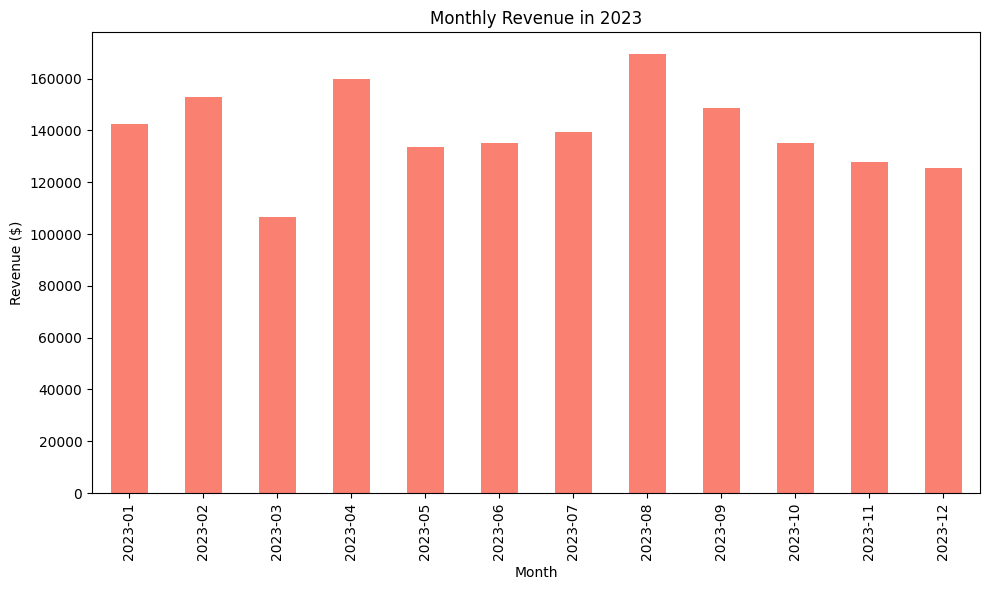

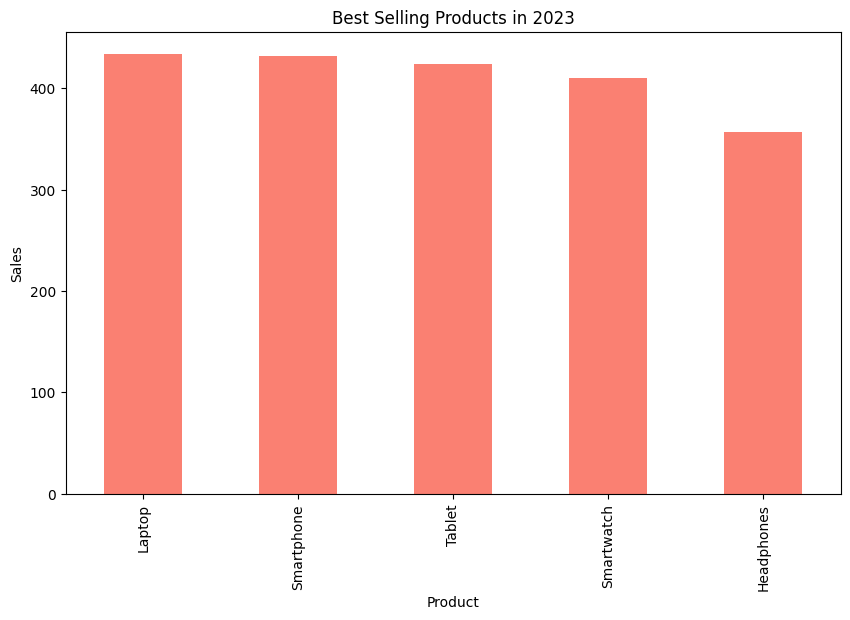

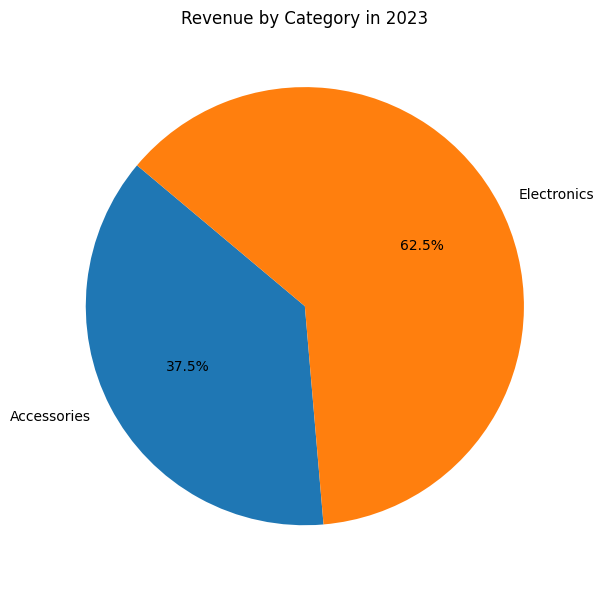

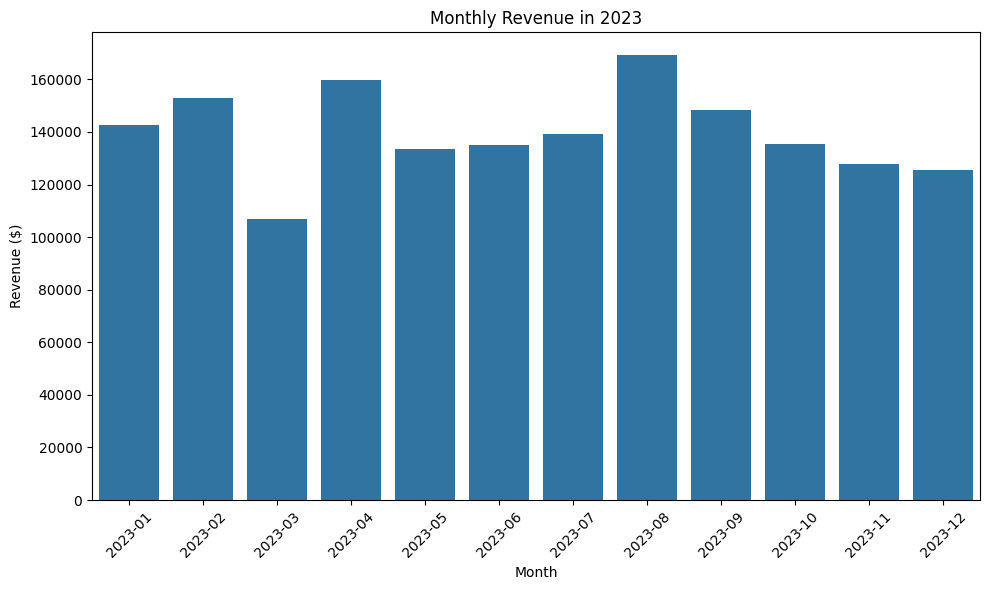

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Monthly Revenue
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='bar', color='salmon')
plt.title('Monthly Revenue in 2023')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

# Plot Best Selling Products
plt.figure(figsize=(10,6))
best_selling.plot(kind='bar', color='salmon')
plt.title('Best Selling Products in 2023')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

# Plot Revenue by Category
plt.figure(figsize=(10,6))
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Category in 2023')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Plot Monthly Revenue using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.title('Monthly Revenue in 2023')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()